<a href="https://colab.research.google.com/github/SarahLisley/Bancodedados/blob/main/valor_total_estoque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import gdown

# Baixar o arquivo do Google Drive usando gdown
url = "https://drive.google.com/uc?id=1b8Q3YUidpckXfZivcpbzRSWJM-JzOGJ0"
output = "estoque.csv"
gdown.download(url, output, quiet=False)

# Ler o arquivo CSV baixado
df = pd.read_csv(output)

# Criar a nova coluna "Valor_Estoque"
df['Valor_Estoque'] = df['Quantidade'] * df['Preco_Unitario']

# Agrupar os dados por "Produto" e somar o valor total de estoque
valor_total_por_produto = df.groupby('Produto')['Valor_Estoque'].sum().reset_index()
valor_total_por_produto = valor_total_por_produto.sort_values(by='Valor_Estoque', ascending=False)

# Exibir resultado
print(valor_total_por_produto)

Downloading...
From: https://drive.google.com/uc?id=1b8Q3YUidpckXfZivcpbzRSWJM-JzOGJ0
To: /content/estoque.csv
100%|██████████| 24.9k/24.9k [00:00<00:00, 40.8MB/s]

            Produto  Valor_Estoque
8    Fone de Ouvido     1136656.38
10          Monitor      943618.36
18          Shampoo      940249.54
13  Papel Higiênico      891702.11
19          Teclado      876115.11
4       Desodorante      874621.57
11            Mouse      867674.57
15         Sabonete      849113.83
20   Água Sanitária      832433.27
5        Detergente      828664.61
3      Desinfetante      748190.68
16      Sabão em Pó      720774.22
0             Arroz      719645.46
14   Pasta de Dente      682512.97
6           Esponja      674606.56
12         Notebook      653612.95
7            Feijão      630808.55
17              Sal      630364.31
1            Açúcar      479149.04
2              Café      476571.30
9          Macarrão      446597.93


In [ ]:
# Filtrar produtos com quantidade menor que 10 unidades
produtos_com_pouca_quantidade = df[df["Quantidade"] < 10].copy()

# Exibir o DataFrame separado
print(produtos_com_pouca_quantidade)


    Data_Atualizacao          Produto    Categoria  Quantidade  \
30        08/12/2023         Notebook  Eletrônicos           6   
35        02/02/2023            Mouse  Eletrônicos           4   
47        21/03/2023  Papel Higiênico      Higiene           3   
79        27/03/2023   Água Sanitária      Limpeza           9   
102       26/11/2023            Arroz    Alimentos           2   
130       24/09/2023      Sabão em Pó      Limpeza           7   
143       25/09/2023  Papel Higiênico      Higiene           3   
152       03/07/2023          Esponja      Limpeza           9   
176       10/11/2023   Fone de Ouvido  Eletrônicos           8   
355       01/02/2023           Açúcar    Alimentos           9   
405       22/09/2023           Feijão    Alimentos           6   
420       28/07/2023       Detergente      Limpeza           1   
456       02/05/2023       Detergente      Limpeza           2   
463       09/01/2023   Água Sanitária      Limpeza           7   
495       

In [3]:
import pandas as pd
import gdown

# Baixar o arquivo do Google Drive
url = "https://drive.google.com/uc?id=1b8Q3YUidpckXfZivcpbzRSWJM-JzOGJ0"
output = "estoque.csv"
gdown.download(url, output, quiet=False)

# Ler o CSV
df = pd.read_csv(output)

# Criar a nova coluna "Valor_Estoque"
df["Valor_Estoque"] = df["Quantidade"] * df["Preco_Unitario"]

# 1. Filtrar produtos com quantidade < 10 e salvar como CSV
produtos_com_pouca_quantidade = df[df["Quantidade"] < 10]
produtos_com_pouca_quantidade.to_csv("estoque_baixo.csv", index=False)

# 2. Agrupar valor total por produto e por categoria
valor_total = df.groupby(["Categoria", "Produto"])["Valor_Estoque"].sum().reset_index()

# Criar um arquivo Excel com abas por categoria
with pd.ExcelWriter("valor_total_estoque.xlsx") as writer:
    for categoria, grupo in valor_total.groupby("Categoria"):
        grupo.to_excel(writer, sheet_name=categoria, index=False)


Downloading...
From: https://drive.google.com/uc?id=1b8Q3YUidpckXfZivcpbzRSWJM-JzOGJ0
To: /content/estoque.csv
100%|██████████| 24.9k/24.9k [00:00<00:00, 28.7MB/s]


In [4]:
import pandas as pd
import gdown
# 5. Identificar o produto mais valioso por categoria

produto_mais_valioso = df.loc[df.groupby('Categoria')['Valor_Estoque'].idxmax()][['Categoria', 'Produto', 'Valor_Estoque']]

print(produto_mais_valioso)

       Categoria     Produto  Valor_Estoque
518    Alimentos      Açúcar       81886.09
383  Eletrônicos    Notebook       90268.20
278      Higiene    Sabonete       92627.24
184      Limpeza  Detergente       83029.62


     Categoria  Valor_Estoque
0  Eletrônicos     4477677.37
1      Higiene     4238200.02
2      Limpeza     3804669.34
3    Alimentos     3383136.59


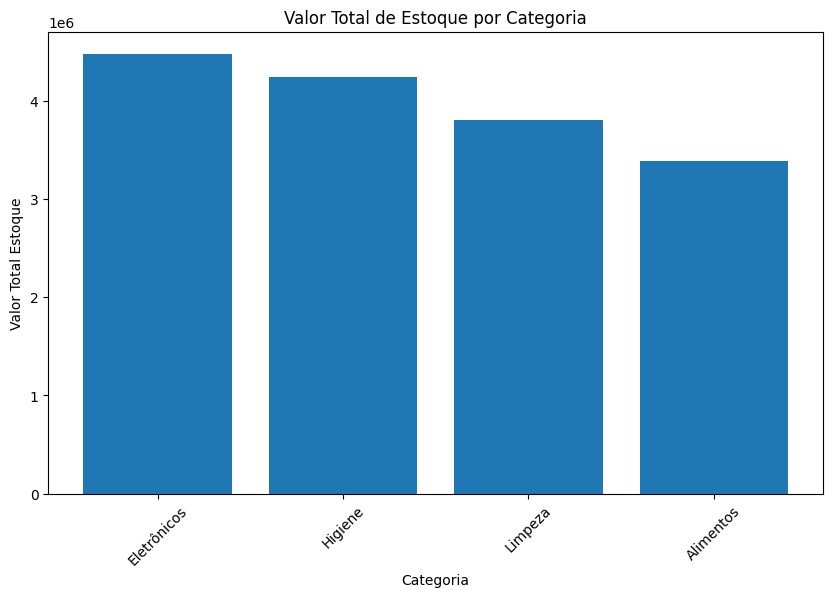

In [6]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt

# 6. Calcular o valor total do estoque por categoria

valor_total_categoria = df.groupby('Categoria')['Valor_Estoque'].sum().sort_values(ascending=False).reset_index()

print(valor_total_categoria)

plt.figure(figsize=(10, 6))
plt.bar(valor_total_categoria['Categoria'], valor_total_categoria['Valor_Estoque'])
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Valor Total Estoque')
plt.title('Valor Total de Estoque por Categoria')
plt.show()


In [8]:
import pandas as pd
import gdown

# 7. Classificar produtos em faixas de estoque

def classificar_estoque(row):
    if row['Quantidade'] < 10:
        return 'Baixo'
    elif row['Quantidade'] <= 50:
        return 'Médio'
    else:
        return 'Alto'

df['Nivel_Estoque'] = df.apply(classificar_estoque, axis=1)

nivel_estoque_contagem = df['Nivel_Estoque'].value_counts()

print(nivel_estoque_contagem)


Nivel_Estoque
Alto     462
Médio    120
Baixo     18
Name: count, dtype: int64


    Ano_Mes  numero_atualizacoes  quantidade_media
0   2023-01                   44         94.363636
1   2023-02                   27         98.111111
2   2023-03                   49         94.224490
3   2023-04                   50        106.140000
4   2023-05                   50         92.580000
5   2023-06                   59        103.881356
6   2023-07                   54        104.333333
7   2023-08                   53        108.622642
8   2023-09                   53        109.245283
9   2023-10                   56        109.107143
10  2023-11                   53        100.773585
11  2023-12                   52        115.442308


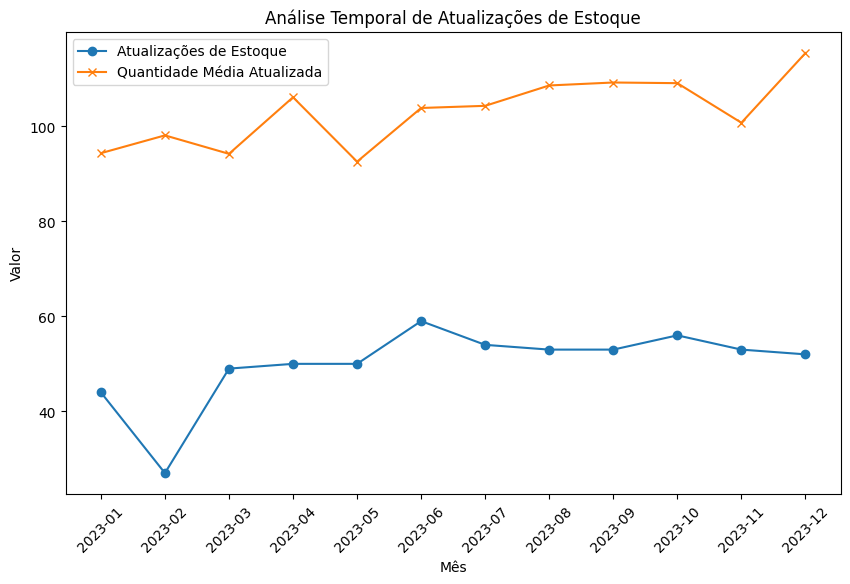

In [11]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt

# 8. Análise temporal (Bônus)

df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'], format='%d/%m/%Y')

df['Ano_Mes'] = df['Data_Atualizacao'].dt.to_period('M')

atualizacoes_mensais = df.groupby('Ano_Mes').agg(
    numero_atualizacoes=('Produto', 'count'),
    quantidade_media=('Quantidade', 'mean')
).reset_index()

print(atualizacoes_mensais)

plt.figure(figsize=(10, 6))

plt.plot(atualizacoes_mensais['Ano_Mes'].astype(str), atualizacoes_mensais['numero_atualizacoes'], label='Atualizações de Estoque', marker='o')

plt.plot(atualizacoes_mensais['Ano_Mes'].astype(str), atualizacoes_mensais['quantidade_media'], label='Quantidade Média Atualizada', marker='x')

plt.xlabel('Mês')
plt.ylabel('Valor')
plt.title('Análise Temporal de Atualizações de Estoque')
plt.xticks(rotation=45)
plt.legend()
plt.show()
